In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
import xlrd

**一、导入数据**

In [160]:
try:
    csrdata = pd.read_csv('csrdata.csv')
except FileNotFoundError:
    print('错误： 没有找到文件')

In [161]:
csrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          942 non-null    int64  
 1   name         942 non-null    object 
 2   category     942 non-null    object 
 3   block        942 non-null    object 
 4   block2       942 non-null    object 
 5   will         942 non-null    object 
 6   rank         942 non-null    object 
 7   pros         942 non-null    object 
 8   NP           942 non-null    object 
 9   CSR          942 non-null    float64
 10  M            942 non-null    float64
 11  C            942 non-null    float64
 12  T            942 non-null    float64
 13  i            942 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(7), int64(1), object(9)
memory usage: 125.2+ KB


In [162]:
csrdata.head()

,num,name,category,block,block2,will,rank,pros,NP,CSR,M,C,T,i,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,复星医药,医药,沪市主板,主板,应规,AA+,稳定,"3,019.88",87.00,26.25,39.20,14.41,7.14,NaN,NaN,NaN
1,2,中国平安,金融,沪市主板,主板,应规,AA,稳定,"120,452.00",85.52,26.25,39.02,12.43,7.81,NaN,NaN,NaN
2,3,中国建筑,建筑业,沪市主板,主板,应规,AA,稳定,"38,240.00",84.17,25.55,35.86,14.01,8.75,NaN,NaN,NaN
3,4,招商银行,金融,沪市主板,主板,应规,AA,稳定,"80,819.00",82.59,24.61,37.79,12.53,7.66,NaN,NaN,NaN
4,5,农业银行,金融,沪市主板,主板,应规,AA,稳定,"202,631.00",82.56,24.84,37.09,13.13,7.50,NaN,NaN,NaN


**二、数据清洗**

In [163]:
# 把name列作为索引，只保留需要的列
csrdata.set_index('name', drop = True, append = False, inplace = True)
csrdata = csrdata[['category', 'block', 'will', 'NP', 'CSR', 'M', 'C', 'T', 'i']]
csrdata.head()

,category,block,will,NP,CSR,M,C,T,i
name,,,,,,,,,
复星医药,医药,沪市主板,应规,"3,019.88",87.00,26.25,39.20,14.41,7.14
中国平安,金融,沪市主板,应规,"120,452.00",85.52,26.25,39.02,12.43,7.81
中国建筑,建筑业,沪市主板,应规,"38,240.00",84.17,25.55,35.86,14.01,8.75
招商银行,金融,沪市主板,应规,"80,819.00",82.59,24.61,37.79,12.53,7.66
农业银行,金融,沪市主板,应规,"202,631.00",82.56,24.84,37.09,13.13,7.50


In [164]:
# 判断数据集是否有缺失值
csrdata[csrdata.isnull().values == True]

,category,block,will,NP,CSR,M,C,T,i
name,,,,,,,,,


In [165]:
def try_transform():
    try:
        csrdata['NP'] = csrdata['NP'].str.replace(',', '').astype(float)
    except ValueError as e:
        print('错误：数据类型不匹配')
        print(e)

In [166]:
try_transform()

错误：数据类型不匹配
could not convert string to float: '未披露'


In [167]:
csrdata['NP'] = csrdata['NP'].replace('未披露', np.nan)
try_transform()

错误：数据类型不匹配
could not convert string to float: '披露'


In [168]:
csrdata['NP'] = csrdata['NP'].replace('披露', np.nan)
try_transform()

错误：数据类型不匹配
could not convert string to float: '200+'


In [169]:
csrdata['NP'] = csrdata['NP'].replace('200+', np.nan)
try_transform()

错误：数据类型不匹配
could not convert string to float: '未皮瘤'


In [170]:
csrdata['NP'] = csrdata['NP'].replace('未皮瘤', np.nan)
try_transform()

In [171]:
try:
    csrdata['i'] = csrdata['i'].astype(float)
except ValueError as e:
    print('错误：数据类型不匹配')
    print(e)

错误：数据类型不匹配
could not convert string to float: '-'


In [172]:
csrdata['i'] = csrdata['i'].replace('-', np.nan)
try:
    csrdata['i'] = csrdata['i'].astype(float)
except ValueError as e:
    print('错误：数据类型不匹配')
    print(e)

In [173]:
# 去除缺失值
csrdata = csrdata.dropna()

In [174]:
csrdata

,category,block,will,NP,CSR,M,C,T,i
name,,,,,,,,,
复星医药,医药,沪市主板,应规,3019.88,87.00,26.25,39.20,14.41,7.14
中国平安,金融,沪市主板,应规,120452.00,85.52,26.25,39.02,12.43,7.81
中国建筑,建筑业,沪市主板,应规,38240.00,84.17,25.55,35.86,14.01,8.75
招商银行,金融,沪市主板,应规,80819.00,82.59,24.61,37.79,12.53,7.66
农业银行,金融,沪市主板,应规,202631.00,82.56,24.84,37.09,13.13,7.50
...,...,...,...,...,...,...,...,...,...
紫金银行,金融,沪市主板,自愿,248.45,25.66,9.38,11.25,3.16,1.88
世运电路,信息技术业,沪市主板,自愿,303.31,25.41,8.44,10.20,5.53,1.25
青海华鼎,机械,沪市主板,应规,226.00,25.40,10.55,7.03,7.40,0.42


In [175]:
# 删除异常值
class Outliers:
    def __init__(self, col):
        self.col = col
    
    def detect_outliers(self):
        mask = (csrdata[self.col] - csrdata[self.col].mean()).abs() > 3 * csrdata[self.col].std()
        print('{}的异常值：{}\n'.format(self.col, csrdata[mask][self.col],'\n'))
    
    def delete_outliers(self):
        i_mask = (csrdata[self.col] - csrdata[self.col].mean()).abs() <= 3 * csrdata[self.col].std()
        return csrdata[i_mask]

In [176]:
outlier1 = Outliers('NP')
outlier2 = Outliers('CSR')
outlier3 = Outliers('M')
outlier4 = Outliers('C')
outlier5 = Outliers('T')
outlier6 = Outliers('i')

outlier1.detect_outliers()
csrdata = outlier1.delete_outliers()
outlier2.detect_outliers()
csrdata = outlier2.delete_outliers()
outlier3.detect_outliers()
csrdata = outlier3.delete_outliers()
outlier4.detect_outliers()
csrdata = outlier4.delete_outliers()
outlier5.detect_outliers()
csrdata = outlier5.delete_outliers()
outlier6.detect_outliers()
csrdata = outlier6.delete_outliers()

NP的异常值：name
长安汽车    4460878.0
Name: NP, dtype: float64

CSR的异常值：name
复星医药    87.00
中国平安    85.52
Name: CSR, dtype: float64

M的异常值：Series([], Name: M, dtype: float64)

C的异常值：Series([], Name: C, dtype: float64)

T的异常值：name
中国建筑    14.01
招商蛇口    14.11
中国神华    14.01
紫金银行     3.16
出版传媒     3.45
Name: T, dtype: float64

i的异常值：name
营口港    43.19
Name: i, dtype: float64



In [177]:
csrdata

,category,block,will,NP,CSR,M,C,T,i
name,,,,,,,,,
招商银行,金融,沪市主板,应规,80819.00,82.59,24.61,37.79,12.53,7.66
农业银行,金融,沪市主板,应规,202631.00,82.56,24.84,37.09,13.13,7.50
兴业银行,金融,沪市主板,应规,60620.00,81.09,26.72,35.51,11.05,7.81
工商银行,金融,沪市主板,应规,298700.00,80.60,25.08,34.98,12.73,7.81
交通银行,金融,沪市主板,应规,73630.00,78.88,23.67,34.98,12.73,7.50
...,...,...,...,...,...,...,...,...,...
凤凰传媒,传播与文化业,沪市主板,应规,960.00,26.23,8.44,11.25,4.05,2.50
宁波联合,批发,沪市主板,自愿,19.83,25.67,9.14,8.44,8.09,0.00
世运电路,信息技术业,沪市主板,自愿,303.31,25.41,8.44,10.20,5.53,1.25


In [178]:
csrdata[['category', 'CSR']].groupby(by = 'category').count()

,CSR
category,
交通运输,27
传播与文化业,10
信息技术业,31
农,4
医药,35
建筑业,22
房地产业,27
批发,23
木材,1


In [179]:
csrdata['category'] = csrdata['category'].replace(['农', '木材', '纺织', '造纸'], '其它')

**三、探索性分析**

In [180]:
category = csrdata['category']
block = csrdata['block']
will = csrdata['will']
NP = csrdata['NP']
CSR = csrdata['CSR']
M = csrdata['M']
C = csrdata['C']
T = csrdata['T']
i = csrdata['i']

In [181]:
plt.rc('font', family = 'SimHei', size = '6')

<AxesSubplot:xlabel='category', ylabel='CSR'>

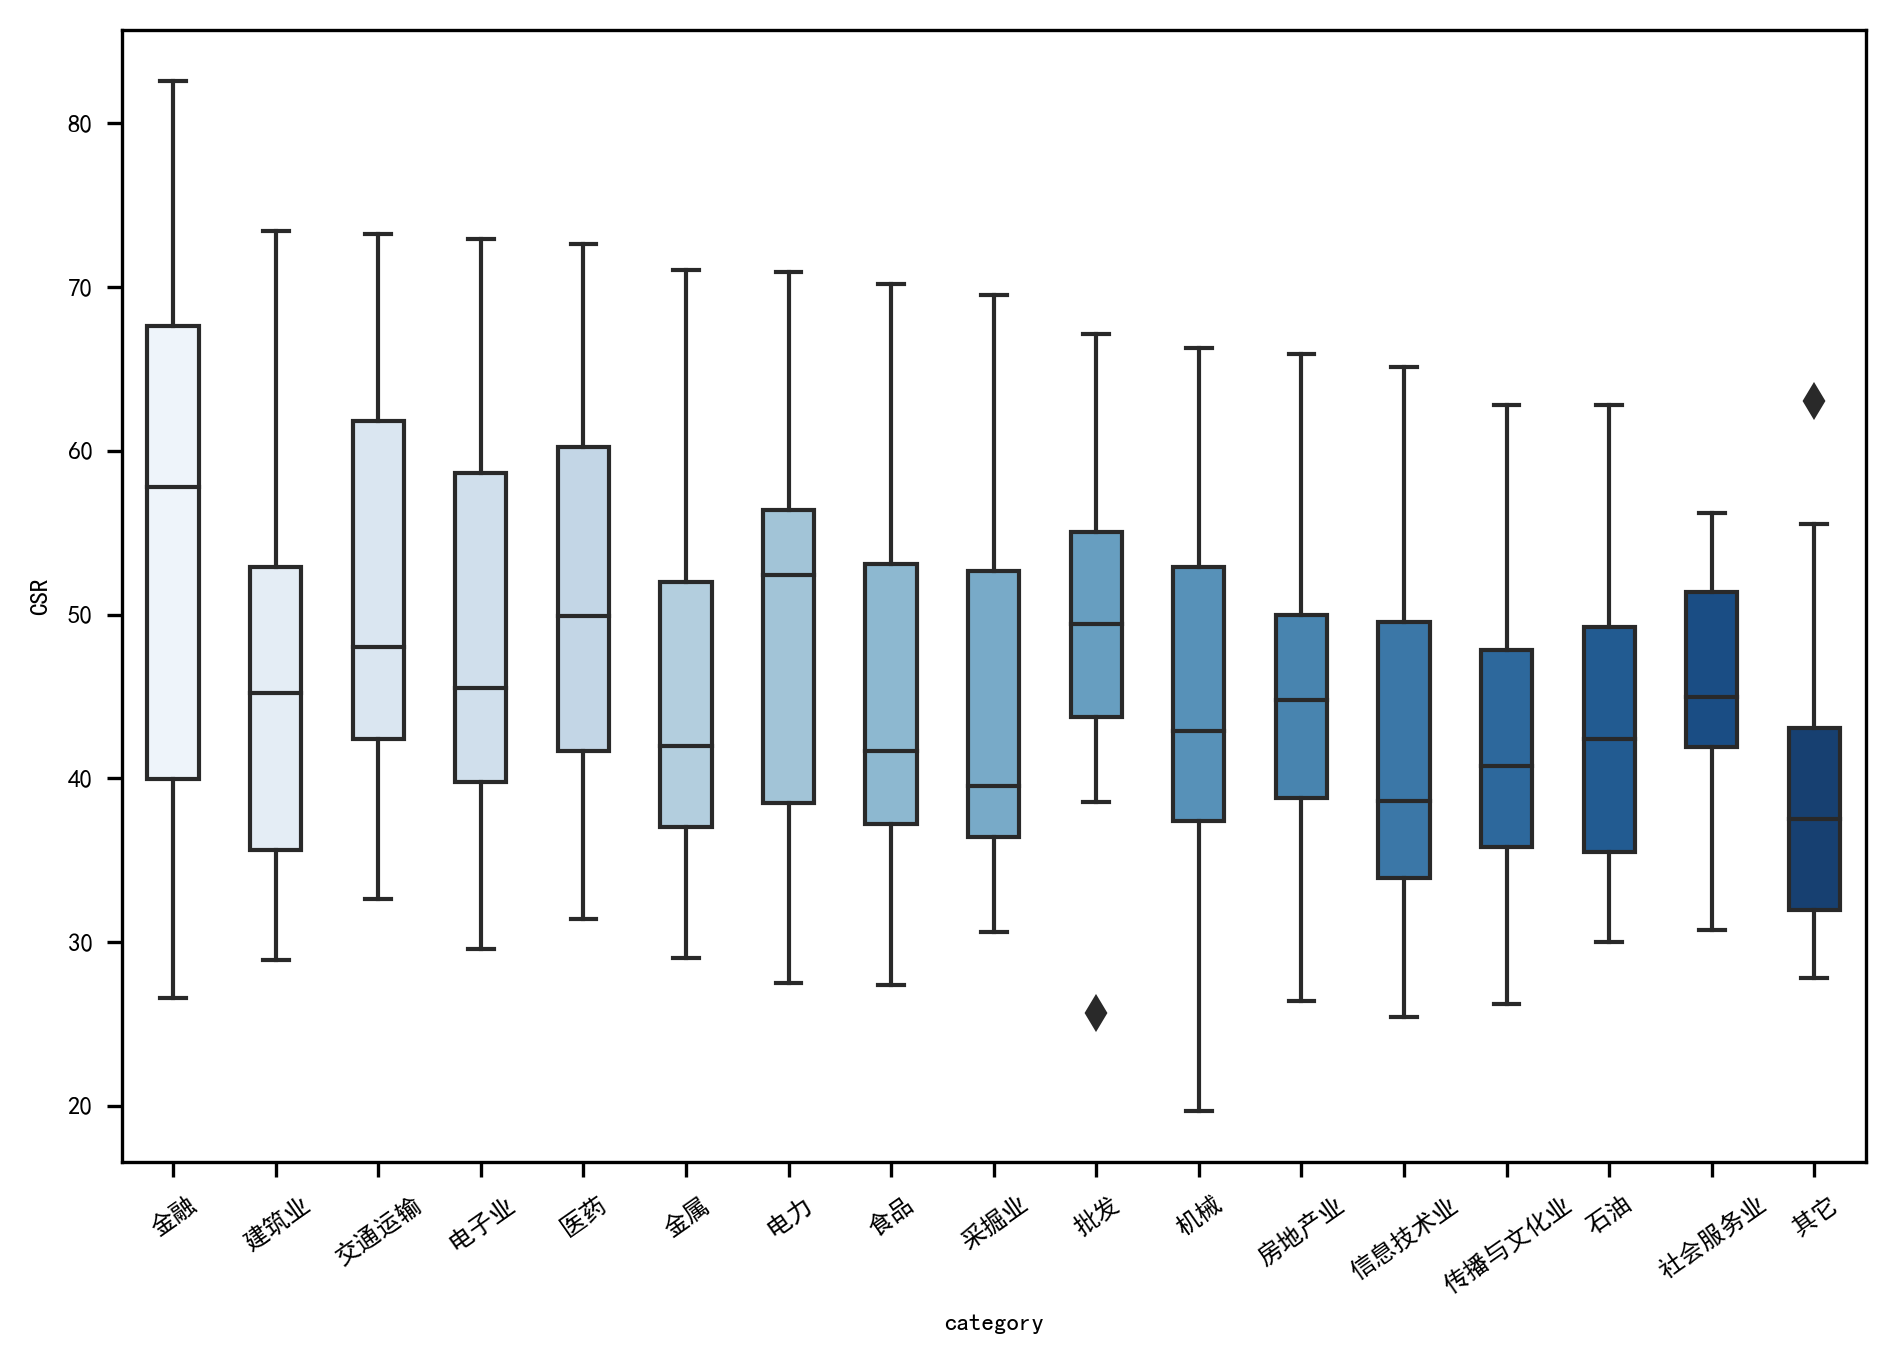

In [182]:
plt.figure(dpi = 300, figsize = (7.5, 5))
plt.xticks(rotation=35)
csrdata['category'] = csrdata['category'].astype('category')
sns.boxplot(x = csrdata['category'].cat.reorder_categories(['金融', '建筑业', '交通运输', '电子业', '医药', '金属', '电力',
                                                  '食品', '采掘业', '批发', '机械', '房地产业', '信息技术业', '传播与文化业',
                                                  '石油', '社会服务业', '其它'],
                                                  ordered=True,inplace=False),
           y = 'CSR', data = csrdata, width = 0.5,
           linewidth = 1.0, palette = 'Blues')

In [183]:
csrdata[['block', 'CSR']].groupby(by = 'block').count()

,CSR
block,
沪市主板,285
深市中小板,85
深市主板,77
深市创业板,36


<AxesSubplot:xlabel='block', ylabel='CSR'>

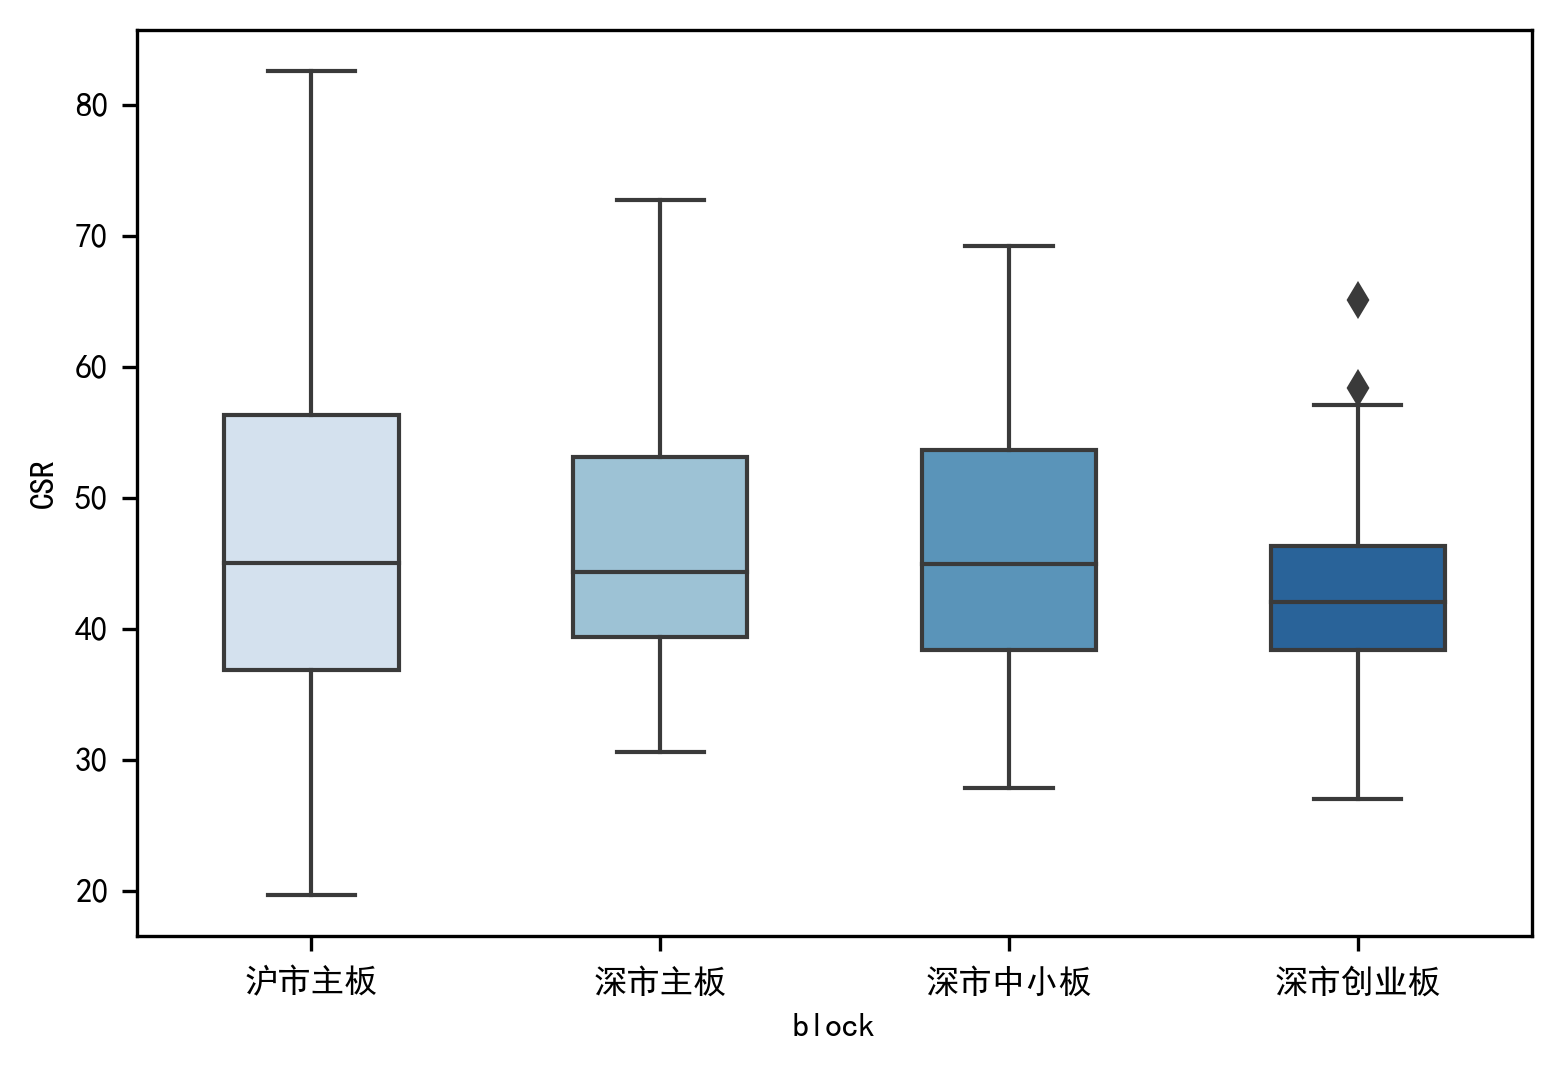

In [184]:
plt.figure(dpi = 300)
plt.rc('font', family = 'SimHei', size = '8')
sns.boxplot(x = 'block',y = 'CSR', data = csrdata, width = 0.5,
           linewidth = 1.0, palette = 'Blues')

In [185]:
csrdata[['will', 'CSR']].groupby(by = 'will').count()

,CSR
will,
应规,216
自愿,267


<AxesSubplot:xlabel='will', ylabel='CSR'>

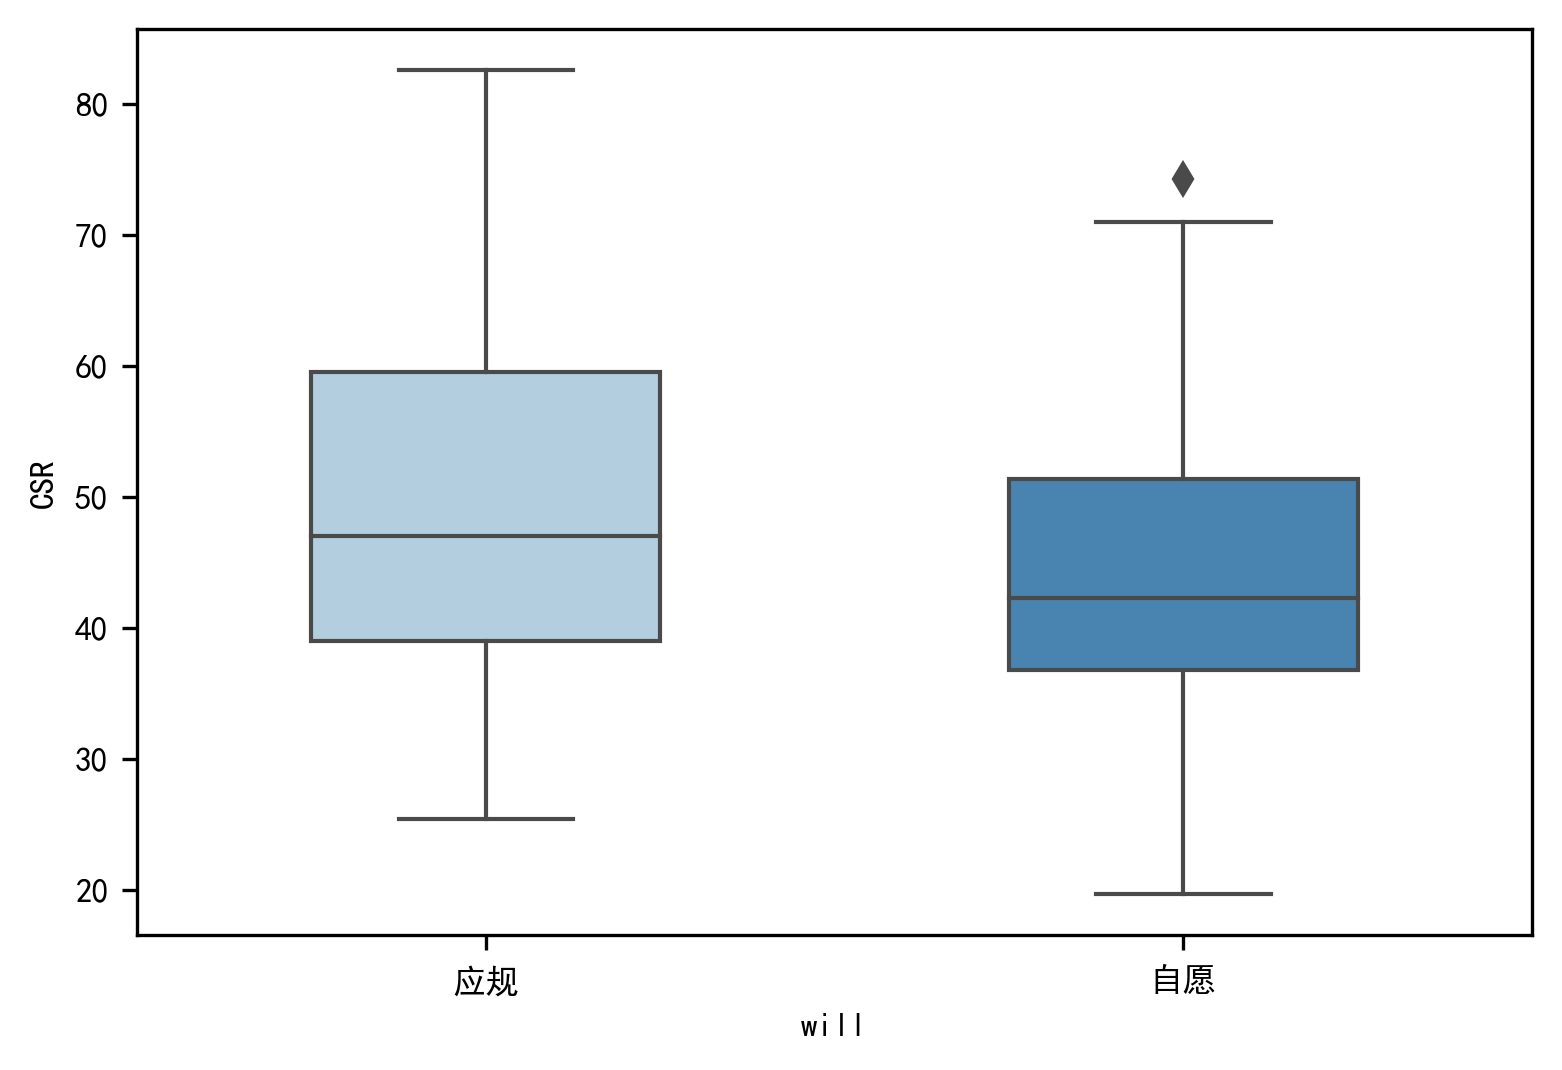

In [186]:
plt.figure(dpi = 300)
plt.rc('font', family = 'SimHei', size = '8')
sns.boxplot(x = 'will',y = 'CSR', data = csrdata, width = 0.5,
           linewidth = 1.0, palette = 'Blues')

In [187]:
def dist(x, s):
    plt.figure(dpi = 300)
    plt.rc('font', family = 'SimHei', size = s)
    return sns.displot(x, kde = True)

<Figure size 1800x1200 with 0 Axes>

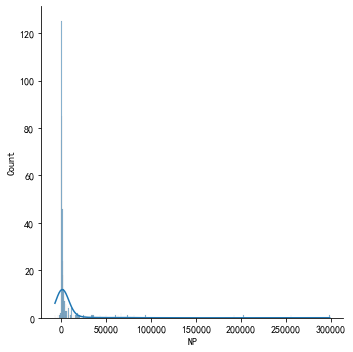

In [188]:
plt.figure(dpi = 300)
plt.rc('font', family = 'SimHei', size = '10')
sns.displot(NP, kde = True)

In [189]:
NP = np.log(NP)

E:\python\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1800x1200 with 0 Axes>

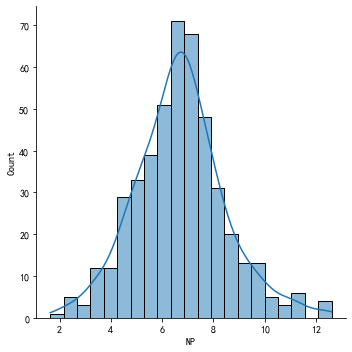

In [190]:
dist(NP, 10)

In [191]:
print(stats.shapiro(NP))

ShapiroResult(statistic=nan, pvalue=1.0)


<Figure size 1800x1200 with 0 Axes>

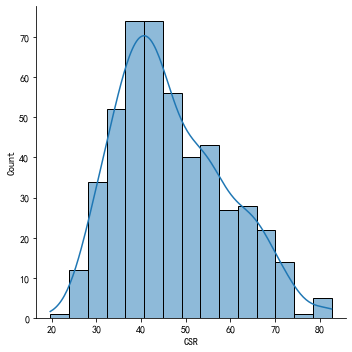

In [192]:
dist(CSR, 10)

<Figure size 1800x1200 with 0 Axes>

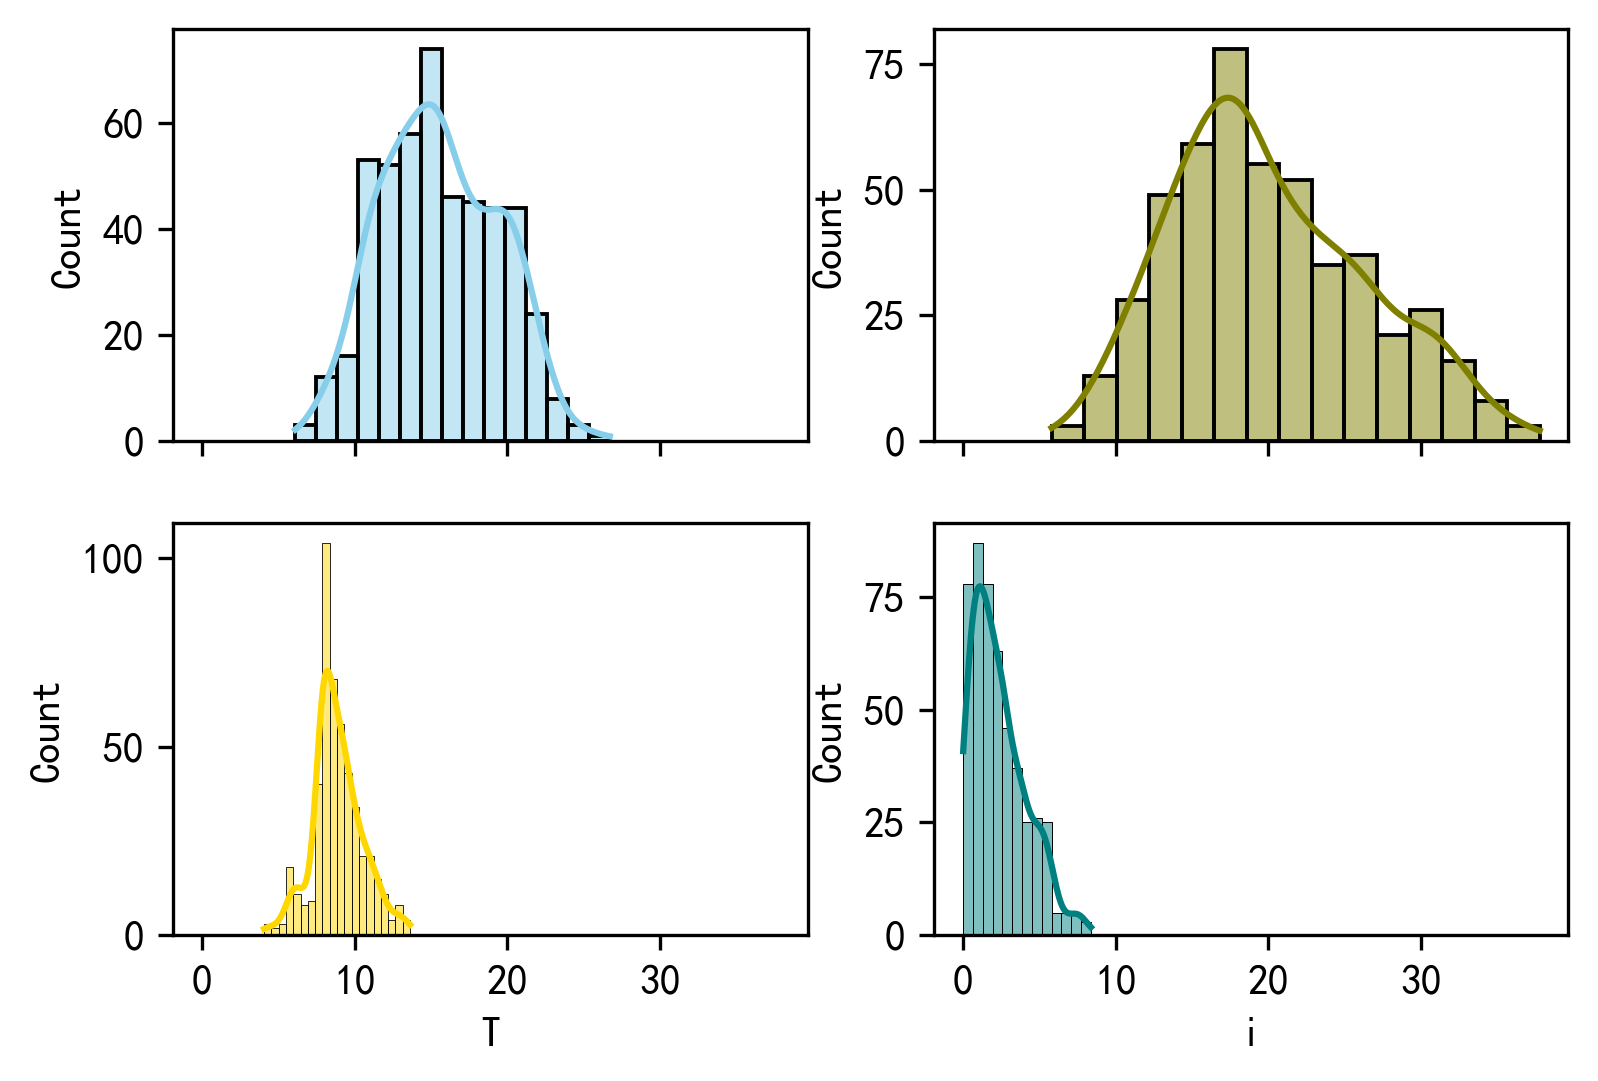

In [193]:
plt.figure(dpi = 300)
plt.rc('font', family = 'SimHei', size = '10')
f, axes = plt.subplots(2, 2, dpi = 300, sharex=True)
sns.histplot(M, color="skyblue", ax=axes[0, 0], kde = True)
sns.histplot(C, color="olive", ax=axes[0, 1], kde = True)
sns.histplot(T, color="gold", ax=axes[1, 0], kde = True)
sns.histplot(i, color="teal", ax=axes[1, 1], kde = True)
plt.show()

<AxesSubplot:xlabel='category', ylabel='CSR'>

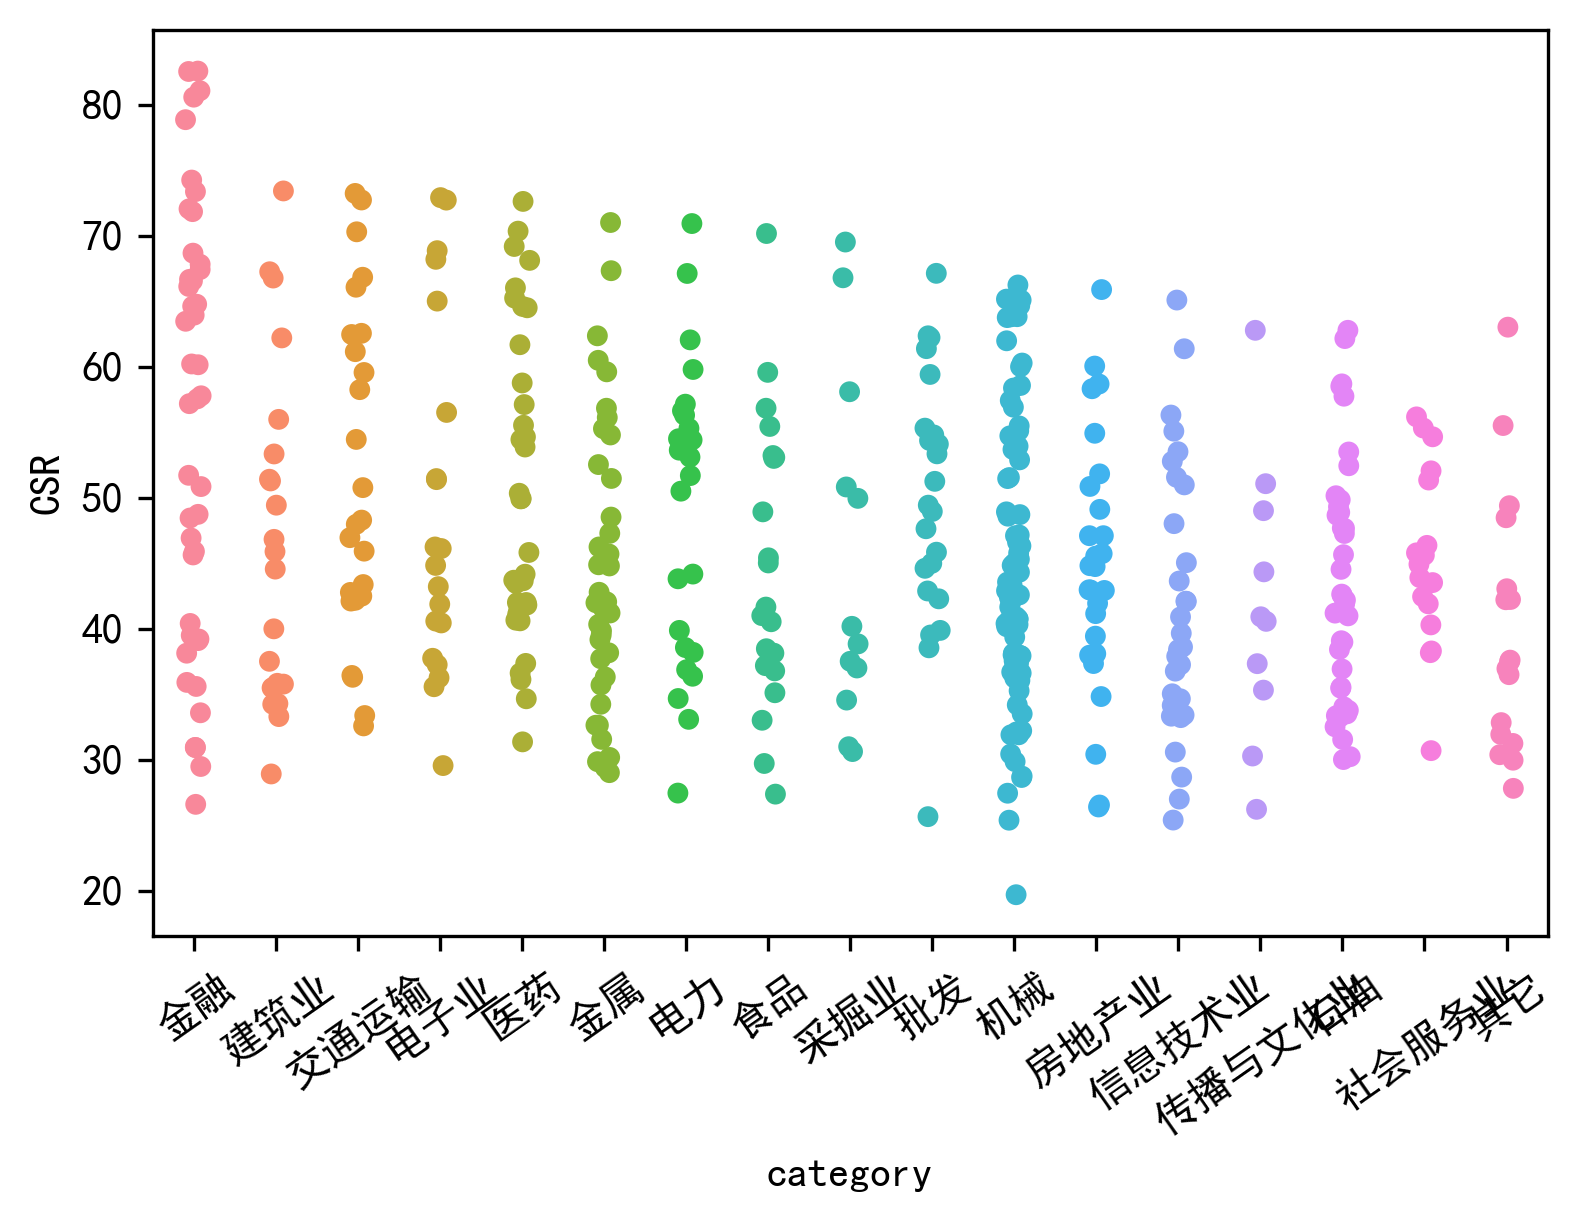

In [194]:
plt.figure(dpi = 300)
plt.xticks(rotation=35)
plt.rc('font', family = 'SimHei', size = '4')
sns.stripplot(x = csrdata['category'].cat.reorder_categories(['金融', '建筑业', '交通运输', '电子业', '医药', '金属', '电力',
                                                  '食品', '采掘业', '批发', '机械', '房地产业', '信息技术业', '传播与文化业',
                                                  '石油', '社会服务业', '其它'],
                                                  ordered=True,inplace=False), 
              y = 'CSR', data = csrdata, jitter = True)

In [195]:
correlation = csrdata[['CSR', 'NP', 'M', 'C', 'T', 'i']].corr()

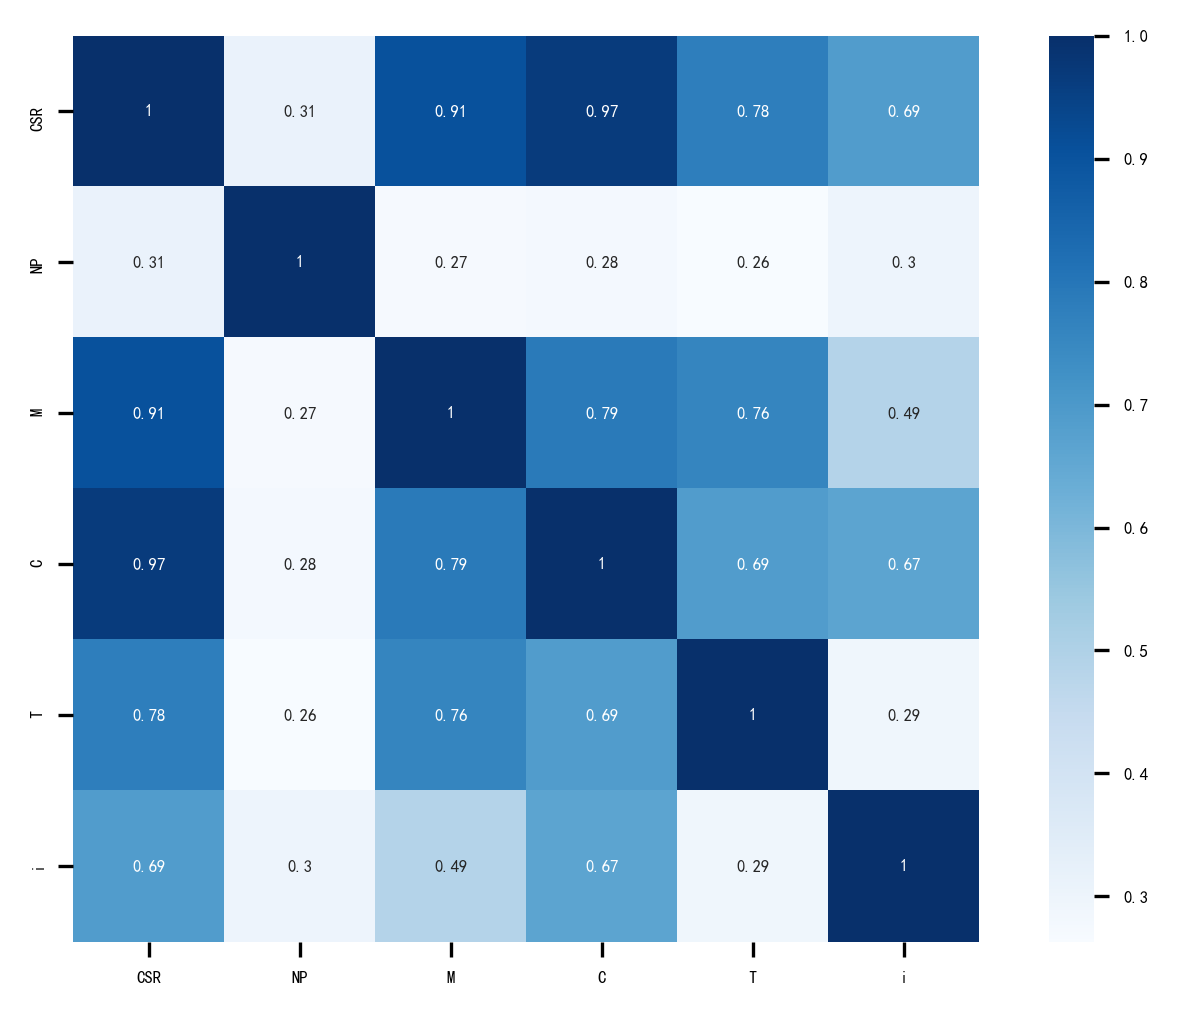

In [196]:
plt.subplots(dpi = 300)
sns.heatmap(correlation, annot = True, vmax = 1, square = True, cmap = 'Blues')
plt.show()

**四、建模分析**

In [197]:
csrdata['NP'] = np.log(csrdata['NP'])

E:\python\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [198]:
csrdata = csrdata.dropna()
csrdata = csrdata.reset_index(drop=False)

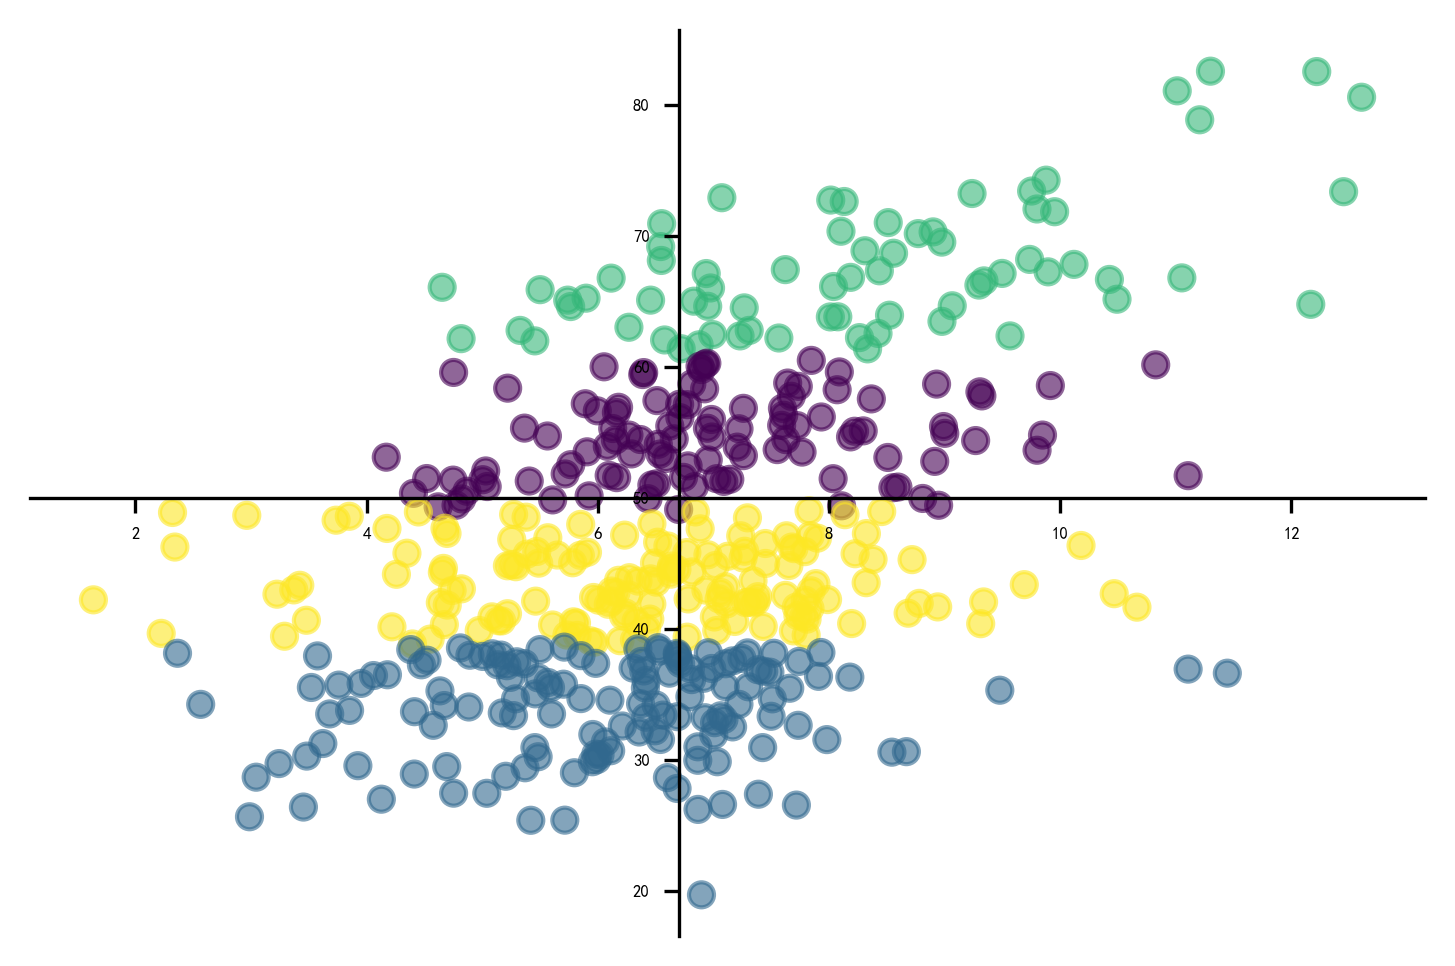

In [199]:
plt.figure(dpi = 300)
class_pred = KMeans(n_clusters=4, random_state=170).fit_predict(csrdata[['NP', 'CSR']])
plt.scatter(csrdata['NP'], csrdata['CSR'], c=class_pred, alpha = 0.6)

ax=plt.gca()
ax.spines['right'].set_color('none') #只保留一条纵坐标轴，形成象限图
ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',np.mean(NP)))
ax.spines['bottom'].set_position(('data',50))

In [200]:
csrdata

,name,category,block,will,NP,CSR,M,C,T,i
0,招商银行,金融,沪市主板,应规,11.299967,82.59,24.61,37.79,12.53,7.66
1,农业银行,金融,沪市主板,应规,12.219142,82.56,24.84,37.09,13.13,7.50
2,兴业银行,金融,沪市主板,应规,11.012380,81.09,26.72,35.51,11.05,7.81
3,工商银行,金融,沪市主板,应规,12.607195,80.60,25.08,34.98,12.73,7.81
4,交通银行,金融,沪市主板,应规,11.206808,78.88,23.67,34.98,12.73,7.50
...,...,...,...,...,...,...,...,...,...,...
462,凤凰传媒,传播与文化业,沪市主板,应规,6.866933,26.23,8.44,11.25,4.05,2.50
463,宁波联合,批发,沪市主板,自愿,2.987196,25.67,9.14,8.44,8.09,0.00
464,世运电路,信息技术业,沪市主板,自愿,5.714755,25.41,8.44,10.20,5.53,1.25
465,青海华鼎,机械,沪市主板,应规,5.420535,25.40,10.55,7.03,7.40,0.42


In [201]:
ohe = OneHotEncoder()

In [202]:
def onehot(x):
    cat = ohe.fit_transform(csrdata[[x]]).toarray()
    cat_df = pd.DataFrame(cat, columns= ohe.get_feature_names())
    temp = pd.concat([csrdata, cat_df], axis = 1)
    del temp[x]
    return temp

In [203]:
csrdata = onehot('category')
csrdata = onehot('block')
csrdata = onehot('will')
csrdata.head()

,name,NP,CSR,M,C,T,i,x0_交通运输,x0_传播与文化业,x0_信息技术业,...,x0_采掘业,x0_金属,x0_金融,x0_食品,x0_沪市主板,x0_深市中小板,x0_深市主板,x0_深市创业板,x0_应规,x0_自愿
0,招商银行,11.299967,82.59,24.61,37.79,12.53,7.66,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,农业银行,12.219142,82.56,24.84,37.09,13.13,7.50,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,兴业银行,11.012380,81.09,26.72,35.51,11.05,7.81,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,工商银行,12.607195,80.60,25.08,34.98,12.73,7.81,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,交通银行,11.206808,78.88,23.67,34.98,12.73,7.50,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [205]:
m_dta = csrdata.drop(csrdata.iloc[:, [0, 3, 4, 5, 6, 29, 26, 23]], axis=1)
X = m_dta.loc[:, m_dta.columns != 'CSR']
y = m_dta['CSR']
X.head()

,NP,x0_交通运输,x0_传播与文化业,x0_信息技术业,x0_其它,x0_医药,x0_建筑业,x0_房地产业,x0_批发,x0_机械,...,x0_电子业,x0_石油,x0_社会服务业,x0_采掘业,x0_金属,x0_金融,x0_沪市主板,x0_深市中小板,x0_深市创业板,x0_应规
0,11.299967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,12.219142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,11.012380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,12.607195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,11.206808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [207]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(model)
print(lr.intercept_)
print(lr.coef_)

LinearRegression()
24.46104447107482
[ 2.61890181  8.40925942 -3.00183202 -0.44496248 -4.01867441 10.42311486
  3.58026987  3.87970525  7.09917122  1.83085485  7.77290566  4.53440445
  3.85329181  3.11497971 -0.04424108  2.97304287  9.77930365 -0.8222432
  0.99576965 -1.44898544  2.31695676]


In [208]:
y_pred = lr.predict(X_test)

In [209]:
print(r2_score(y_test, y_pred))

0.2593111695003344


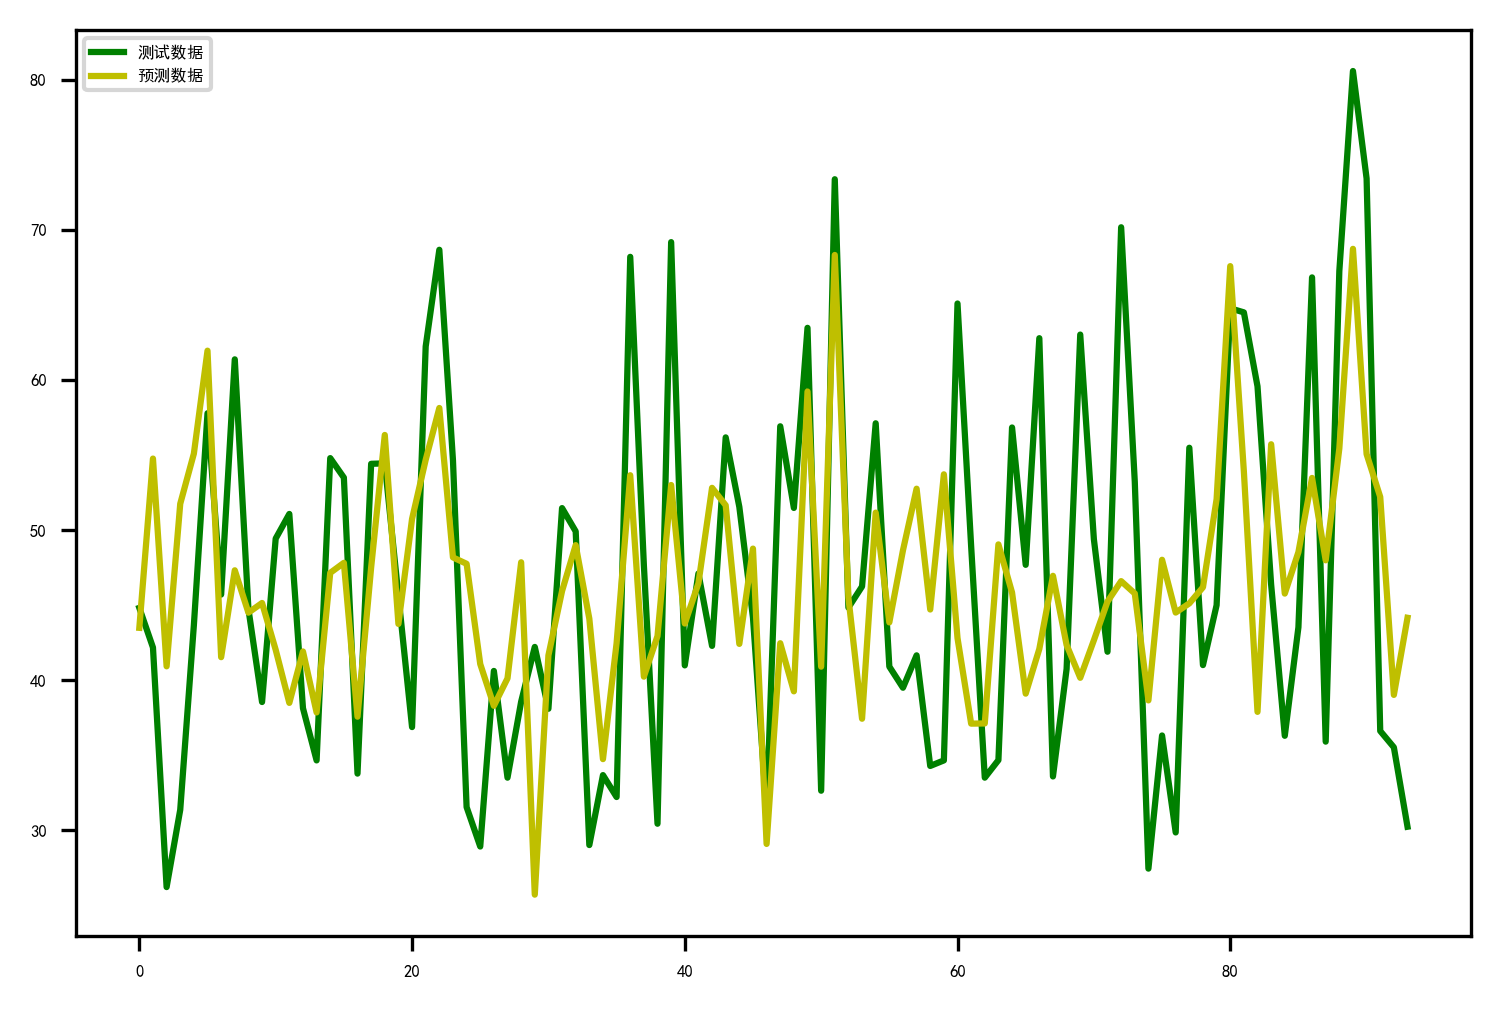

In [215]:
plt.figure(dpi = 300)
plt.plot(range(len(y_test)), y_test, 'g', label='测试数据')
plt.plot(range(len(y_test)), y_pred, '', label='预测数据')
plt.legend()

Text(0, 0.5, '预测值')

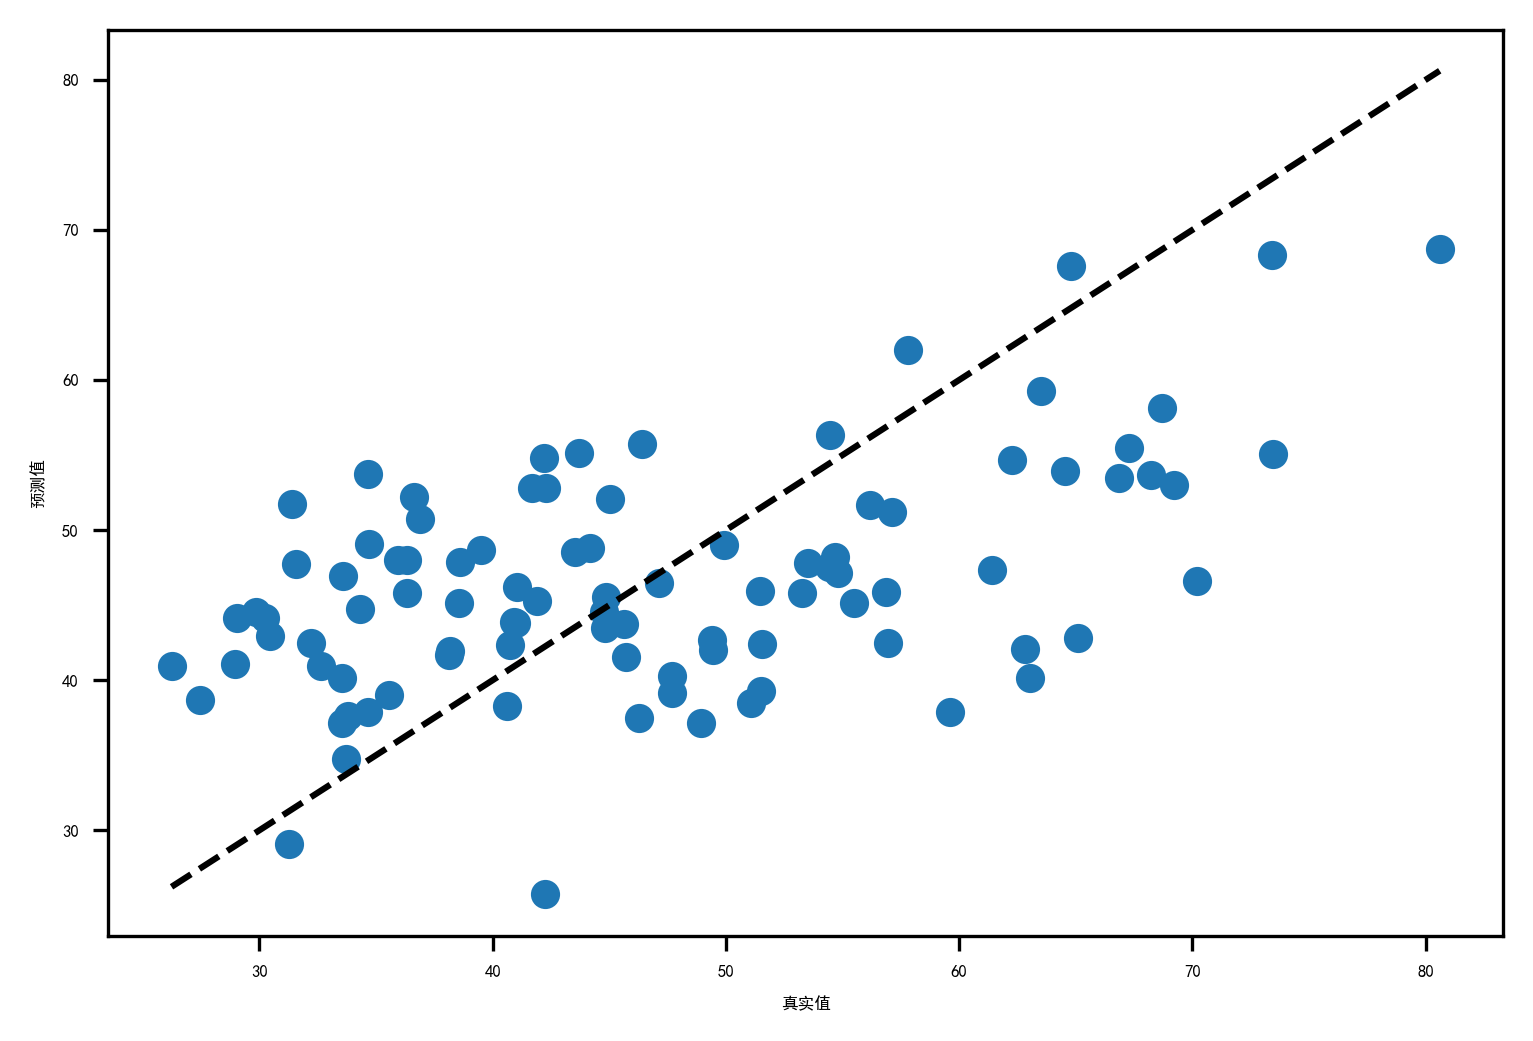

In [216]:
plt.figure(dpi = 300)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.xlabel('真实值')
plt.ylabel('预测值')

In [217]:
CSR = y_train

In [219]:
forward_select(data = X_train, target = 'CSR')

aic is 2835.7827128480226,continuing!
aic is 2827.0183697870502,continuing!
aic is 2817.937760145205,continuing!
aic is 2812.860356336623,continuing!
aic is 2809.7237114364243,continuing!
aic is 2807.3120997287683,continuing!
aic is 2805.643285501097,continuing!
aic is 2804.1500460194566,continuing!
aic is 2804.0076440199696,continuing!
aic is 2803.8247571446045,continuing!
aic is 2803.803452958283,continuing!
for selection over!
final formula is CSR~NP+x0_金融+x0_医药+x0_交通运输+x0_电力+x0_其它+x0_批发+x0_应规+x0_传播与文化业+x0_信息技术业+x0_深市中小板


In [220]:
train = pd.concat([X_train, y_train], axis = 1)

In [221]:
model_new = ols('CSR~NP+x0_金融+x0_医药+x0_交通运输+x0_电力+x0_其它+x0_批发+x0_应规+x0_传播与文化业+x0_信息技术业+x0_深市中小板', data = train)
lr_new = model_new.fit()
lr_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CSR   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     13.13
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           4.59e-21
Time:                        23:29:35   Log-Likelihood:                -1389.9
No. Observations:                 373   AIC:                             2804.
Df Residuals:                     361   BIC:                             2851.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8374      2.316     11.588      0.000      22.283      31.392
NP             2.5540      0.332      7.697      0.000       1.901       3.207
x0_金融          7.2292      2.002      3.610      0.000       3.291      11.167
x0_医药          7.6380      2.210      3.456      0.001       3.291      11.985
x0_交通运输        5.7651      2.353      2.450      0.015       1.138      10.392
x0_电力          5.1866      2.456      2.112      0.035       0.358      10.016
x0_其它         -6.9430      3.011     -2.306      0.022     -12.865      -1.021
x0_批发          4.5215      2.401      1.883      0.060      -0.200       9.243
x0_应规          2.2297      1.121      1.989      0.047       0.026       4.434
x0_传播与文化业     -5.5821      3.953     -1.412      0.159     -13.355       2.191
x0_信息技术业      -3.3773      2.141     -1.577      0.116      -7.588       0.833
x0_深市中小板       2.0362      1.454      1.401      0.162      -0.823       4.895
==============================================================================
Omnibus:                        7.123   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                4.476
Skew:                           0.080   Prob(JB):                        0.107
Kurtosis:                       2.488   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""